<a href="https://colab.research.google.com/github/manishadeepa/smartwriting-pen-and-pad/blob/main/handwriting_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cite for EMNIST dataset:

Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373

In [13]:
#importing the required packages
from tensorflow.keras.utils import get_file
import numpy as np
import gzip
import shutil
import os
import scipy.io
import zipfile

In [14]:
#extracting the files and stuff

zip_path = '/content/drive/MyDrive/matlab.zip'  # update if different
extract_path = '/content/emnist'  # temporary extraction folder in Colab

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

mat_path = extract_path + '/matlab/emnist-balanced.mat'
mat = scipy.io.loadmat(mat_path)


In [15]:
#preprocessing data

x_train = mat['dataset']['train'][0][0]['images'][0][0]
y_train = mat['dataset']['train'][0][0]['labels'][0][0]
x_test = mat['dataset']['test'][0][0]['images'][0][0]
y_test = mat['dataset']['test'][0][0]['labels'][0][0]

# Normalize pixel values
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# Reshape to 28x28 images
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,807 (897.68 KB)

 Trainable params: 229,807 (897.68 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#training the data

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 138s 39ms/step - accuracy: 0.6937 - loss: 1.0447 - val_accuracy: 0.8431 - val_loss: 0.4663
Epoch 2/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 138s 39ms/step - accuracy: 0.8579 - loss: 0.4086 - val_accuracy: 0.8580 - val_loss: 0.4150
Epoch 3/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 135s 37ms/step - accuracy: 0.8779 - loss: 0.3382 - val_accuracy: 0.8697 - val_loss: 0.3759
Epoch 4/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 140s 40ms/step - accuracy: 0.8905 - loss: 0.2929 - val_accuracy: 0.8715 - val_loss: 0.3696
Epoch 5/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 132s 37ms/step - accuracy: 0.8985 - loss: 0.2643 - val_accuracy: 0.8741 - val_loss: 0.3749


In [29]:
#saving the model

model.save('/content/drive/MyDrive/emnist_cnn.keras')


In [30]:
from tensorflow.keras.models import load_model
model = load_model('emnist_cnn.keras')

def predict_character(img):
    img = img.reshape(1, 28, 28, 1)  # ensure correct shape
    prediction = model.predict(img)
    return np.argmax(prediction)


In [38]:
!ls /content/drive/MyDrive/emnist/matlab/

ls: cannot access '/content/drive/MyDrive/emnist/matlab/': No such file or directory


In [31]:
import os
os.listdir()

['.config', 'drive', 'emnist', 'emnist_cnn.keras', 'sample_data']

In [32]:
!find /content/drive -name "*.keras"

/content/drive/MyDrive/emnist_cnn.keras


In [33]:
!ls /content/drive/MyDrive

 Classroom
'CodeStorm Registration.gform'
'CodeStorm Registration (Responses).gsheet'
'Colab Notebooks'
 emnist_cnn.keras
'ESS FAT - 1 ANSWERS.gdoc'
'Event Feedback.gform'
'Event Feedback (Responses).gsheet'
'Hackathon ML files'
 matlab.zip
'Program certificates'
 Screenshot_20250405-165652.png


In [36]:
# Then navigate to where the model is
model_path = '/content/drive/MyDrive/emnist_cnn.keras'

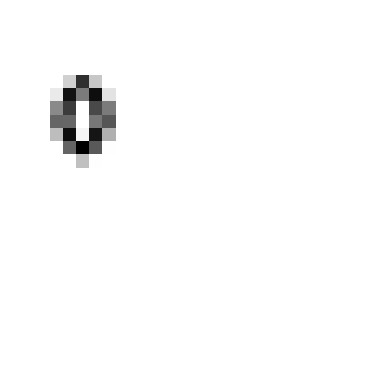

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted class index: 7
Predicted character: 7


In [52]:
import numpy as np
from PIL import Image, ImageDraw
from tensorflow.keras.models import load_model
import scipy.io
import matplotlib.pyplot as plt

# === Step 1: Define stroke_to_image_with_pressure ===
def stroke_to_image_with_pressure(strokes, canvas_size=256, image_size=28,
                                  min_width=2, max_width=12):
    img = Image.new("L", (canvas_size, canvas_size), color=255)
    draw = ImageDraw.Draw(img)

    for stroke in strokes:
        for i in range(len(stroke) - 1):
            x1, y1, p1 = stroke[i]
            x2, y2, p2 = stroke[i + 1]
            avg_pressure = (p1 + p2) / 2
            width = int(min_width + (max_width - min_width) * avg_pressure)
            draw.line([(x1, y1), (x2, y2)], fill=0, width=width)

    img = img.resize((image_size, image_size))
    img_array = np.array(img)
    img_array = 255 - img_array
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, image_size, image_size, 1)
    return img_array, img

# === Step 2: Sample stroke (try a 'C'-like stroke) ===
sample_strokes = [[(50, 100, 0.5), (40, 90, 0.5), (35, 75, 0.5), (40, 60, 0.5),
     (50, 50, 0.5), (60, 60, 0.5), (65, 75, 0.5), (60, 90, 0.5), (50, 100, 0.5)]]

# === Step 3: Convert to image ===
img_array, img = stroke_to_image_with_pressure(sample_strokes)

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


# === Step 4: Load trained model ===
model = load_model(model_path)

# === Step 5: Predict ===
prediction = model.predict(img_array)
predicted_class = prediction.argmax()
print("Predicted class index:", predicted_class)

# === Step 6: Map index to actual character ===
emnist = scipy.io.loadmat('/content/emnist/matlab/emnist-balanced.mat')
mapping = emnist['dataset']['mapping'][0][0]
unicode_val = mapping[predicted_class][1]
char = chr(unicode_val)
print("Predicted character:", char)

In [50]:
print(mapping[:10])  # See first 10 class-index to Unicode mappings

[[ 0 48]
 [ 1 49]
 [ 2 50]
 [ 3 51]
 [ 4 52]
 [ 5 53]
 [ 6 54]
 [ 7 55]
 [ 8 56]
 [ 9 57]]
